# MIDI Parser

In [7]:
from mido import MidiFile
import py_midicsv as pm

fPath = "midi-recordings/ladispute.txt"
rawFile = open(fPath, 'r')

uniqueTypes = [] 
controllerTypes = []

processedCSV = []

for line in rawFile:
    processedLine = line.split(" ")
    
    # processedLine[0] is time in ms
    
    # processedLine[1] is event type
    processedLine[1] = str(int(processedLine[1], 0))
    
    if processedLine[1] not in uniqueTypes:
        uniqueTypes.append(processedLine[1])
    
    #    MIDI EVENT TYPES
    #    0x80 (hex)      128 (decimal)    Note Off
    #    0x90 (hex)      144 (decimal)    Note On
    #    0xB0 (hex)      176 (decimal)    Continuous Controller
    if processedLine[1] == "128":
        processedLine[1] = "Note_off_c"
    if processedLine[1] == "144":
        processedLine[1] = "Note_on_c"
    if processedLine[1] == "176":
        processedLine[1] = "Control_c"
    
    # processedLine[2] is note
    processedLine[2] = str(int(processedLine[2], 0))
    
    # Controller event
    if processedLine[1] == "176":
        if processedLine[2] not in controllerTypes:
            controllerTypes.append(processedLine[2])
    
    # processedLine[3] is velocity
    processedLine[3] = str(int(processedLine[3],0))
    
    # Track value = 1 (MIDI Data)
    # Expects data in the following format:
    # Track, Time, Note_on_c, Channel, Note, Velocity
    # Track, Time, Note_off_c, Channel, Note, Velocity
    # Track, Time, Control_c, Channel, Control_num, Value
    processedLine.insert(0, "1")
    processedLine.insert(3, "1")
    processed = ", ".join(processedLine)
    print(processed)
    processedCSV.append(processed)

processedCSV.insert(0, "1, 0, Start_track")

fileType = 0
clockPulses = 2400
# 0, 0, Header, format, nTracks, division
#   - format: the MIDI file type (0, 1, or 2)
#   - nTracks: the number of tracks in the file
#   - division: the number of clock pulses per quarter note. The Track and Time fields are always zero.
header = "0, 0, Header, " + str(fileType) + ", 1, " + str(clockPulses)
processedCSV.insert(0, header)


timeStamp = processedCSV[-1].split(", ")[1]
endTrack = "1, " + timeStamp + ", End_track"

processedCSV.append(endTrack)
processedCSV.append("0, 0, End_of_file")

with open("processed.csv", "w") as out: 
    for line in processedCSV:
        out.write(line + "\n")
    out.close()

1, 0, Control_c, 1, 64, 8
1, 30, Control_c, 1, 64, 26
1, 60, Control_c, 1, 64, 63
1, 90, Control_c, 1, 64, 127
1, 251, Note_on_c, 1, 51, 48
1, 254, Note_on_c, 1, 63, 45
1, 379, Note_off_c, 1, 63, 87
1, 400, Note_off_c, 1, 51, 82
1, 837, Note_on_c, 1, 55, 51
1, 842, Note_on_c, 1, 58, 48
1, 983, Note_off_c, 1, 55, 80
1, 998, Note_off_c, 1, 58, 75
1, 1495, Note_on_c, 1, 58, 37
1, 1500, Note_on_c, 1, 55, 47
1, 1594, Note_off_c, 1, 55, 74
1, 1607, Note_off_c, 1, 58, 76
1, 1949, Control_c, 1, 64, 75
1, 1979, Control_c, 1, 64, 10
1, 2009, Control_c, 1, 64, 0
1, 2068, Note_on_c, 1, 70, 56
1, 2072, Note_on_c, 1, 51, 48
1, 2429, Control_c, 1, 64, 5
1, 2459, Control_c, 1, 64, 32
1, 2489, Control_c, 1, 64, 69
1, 2519, Control_c, 1, 64, 127
1, 2599, Note_off_c, 1, 51, 83
1, 2637, Note_on_c, 1, 55, 45
1, 2649, Note_on_c, 1, 58, 42
1, 2782, Note_off_c, 1, 55, 79
1, 2798, Note_off_c, 1, 58, 72
1, 3272, Note_on_c, 1, 55, 41
1, 3299, Note_on_c, 1, 58, 27
1, 3358, Note_off_c, 1, 55, 81
1, 3374, Note_off_

In [8]:
# Load the MIDI file and parse it into CSV format
csvFile = open("processed.csv", "r")
midi_parsed = pm.csv_to_midi(csvFile)

# Save the parsed MIDI file to disk
with open("converted.mid", "wb") as output_file:
    midi_writer = pm.FileWriter(output_file)
    midi_writer.write(midi_parsed)

In [9]:
midi_parsed

midi.Pattern(format=0, resolution=2400, tracks=\
[Track(\
  [midi.ControlChangeEvent(tick=0, channel=1, data=[64, 8]),
   midi.ControlChangeEvent(tick=30, channel=1, data=[64, 26]),
   midi.ControlChangeEvent(tick=30, channel=1, data=[64, 63]),
   midi.ControlChangeEvent(tick=30, channel=1, data=[64, 127]),
   midi.NoteOnEvent(tick=161, channel=1, data=[51, 48]),
   midi.NoteOnEvent(tick=3, channel=1, data=[63, 45]),
   midi.NoteOffEvent(tick=125, channel=1, data=[63, 87]),
   midi.NoteOffEvent(tick=21, channel=1, data=[51, 82]),
   midi.NoteOnEvent(tick=437, channel=1, data=[55, 51]),
   midi.NoteOnEvent(tick=5, channel=1, data=[58, 48]),
   midi.NoteOffEvent(tick=141, channel=1, data=[55, 80]),
   midi.NoteOffEvent(tick=15, channel=1, data=[58, 75]),
   midi.NoteOnEvent(tick=497, channel=1, data=[58, 37]),
   midi.NoteOnEvent(tick=5, channel=1, data=[55, 47]),
   midi.NoteOffEvent(tick=94, channel=1, data=[55, 74]),
   midi.NoteOffEvent(tick=13, channel=1, data=[58, 76]),
   midi.Con

---

Visualized Converted MIDI File (https://chromatone.center/practice/midi/visualizer/)

![visualized](visual.svg)


In [10]:
import pretty_midi
import numpy as np
# For plotting
import mir_eval.display
import librosa.display
import matplotlib.pyplot as plt


In [11]:
def plot_piano_roll(pm, start_pitch, end_pitch, fs=100):
    # Use librosa's specshow function for displaying the piano roll
    librosa.display.specshow(pm.get_piano_roll(fs)[start_pitch:end_pitch],
                             hop_length=1, sr=fs, x_axis='time', y_axis='cqt_note',
                             fmin=pretty_midi.note_number_to_hz(start_pitch))

/Users/pmuthu/miniforge3/envs/stagecast/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: Frequency axis exceeds Nyquist. Did you remember to set all spectrogram parameters in specshow?
  return f(*args, **kwargs)


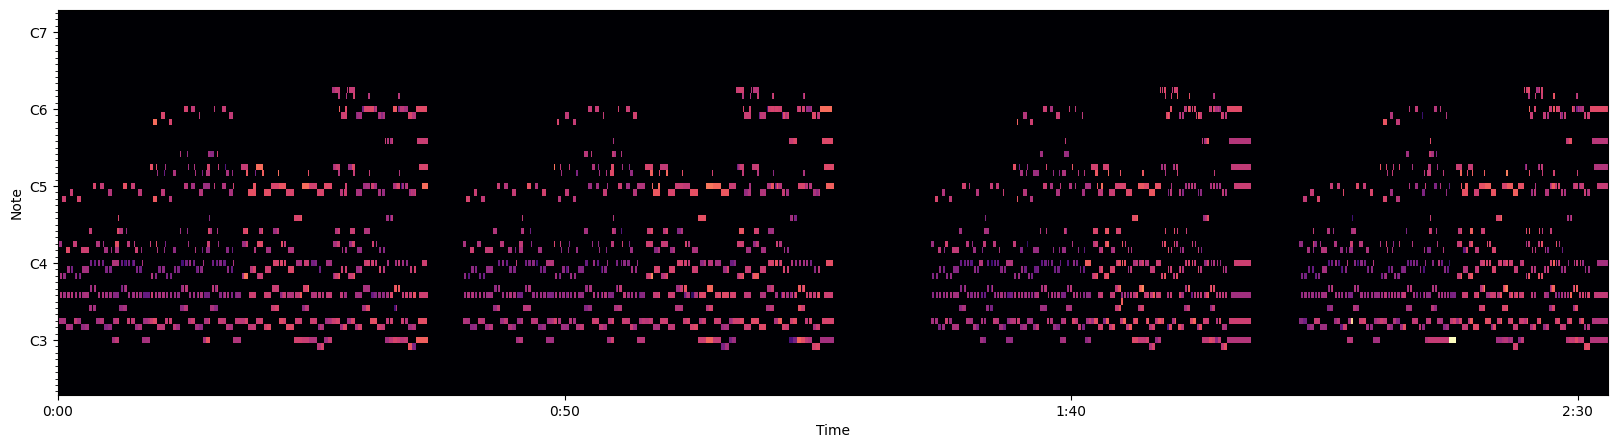

In [12]:
import pretty_midi
import matplotlib.pyplot as plt

pm = pretty_midi.PrettyMIDI('converted.mid')

plt.figure(figsize=(20, 5))
plot_piano_roll(pm, 40, 100)